In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Load Data

In [113]:
microchipDS = pd.read_csv("microchips-tests.csv")
print (microchipDS.info())
microchipDS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
param_1     118 non-null float64
param_2     118 non-null float64
validity    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB
None


,param_1,param_2,validity
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## Data Exploration

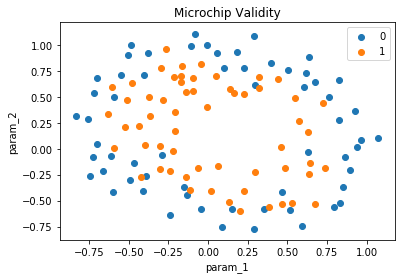

In [114]:
# List of target features we will look to classify 
target_features = [0, 1]

# Set the parameters used to run analysis
x_axis = "param_1"
y_axis = "param_2"

# Plot data
for target in target_features:
    plt.scatter(
        microchipDS[x_axis][microchipDS["validity"] == target],
        microchipDS[y_axis][microchipDS["validity"] == target],
        label = target
    )
    
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title("Microchip Validity")
plt.legend()
plt.show()

## Data Preprocessing

In [115]:
#There are no fields with missing data
microchipDS.isnull().count()
microchipDS.isna().count()

param_1     118
param_2     118
validity    118
dtype: int64

## Train / Test

In [128]:
# Set X, y values to be split
X = microchipDS.iloc[:, 0:2]
y = microchipDS.iloc[:, 2:3]

# Reshape features
num_of_rows = microchipDS.shape[0]
X.values.reshape(num_of_rows, 2)
# y = y.values.ravel()


polynomial_features = PolynomialFeatures(degree = 4)
X = polynomial_features.fit_transform(X)

# Split into training / testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Check shape of training / testing data
print ("X_train shape -> {}".format(X_train.shape))
print("y_train shape -> {}".format(y_train.shape))
print("X_test shape -> {}".format(X_test.shape))
print("y_test shape -> {}".format(y_test.shape))

X_train shape -> (94, 15)
y_train shape -> (94, 1)
X_test shape -> (24, 15)
y_test shape -> (24, 1)


### Normalize Data

In [162]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [171]:
log_reg = LogisticRegression(C = 100, solver = "lbfgs")
log_reg.fit(X_train, y_train.values.ravel())
predictions = log_reg.predict(X_test)

## Results

In [172]:
print ("Training subset accuracy: {}".format(log_reg.score(X_train, y_train)))
print ("Testing subset accuracy: {}".format(log_reg.score(X_test, y_test)))

Training subset accuracy: 0.8085106382978723
Testing subset accuracy: 0.9166666666666666
